<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EE25737:-Introduction-to-Machine-Learning" data-toc-modified-id="EE25737:-Introduction-to-Machine-Learning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><font color="black">EE25737: Introduction to Machine Learning</font></a></span><ul class="toc-item"><li><span><a href="#Implementation-of-some-algorithms-by-NumPy/SciPy" data-toc-modified-id="Implementation-of-some-algorithms-by-NumPy/SciPy-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Implementation of some algorithms by NumPy/SciPy</a></span><ul class="toc-item"><li><span><a href="#[your-name]" data-toc-modified-id="[your-name]-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>[your name]</a></span></li><li><span><a href="#[your-ID]" data-toc-modified-id="[your-ID]-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>[your ID]</a></span></li></ul></li><li><span><a href="#2.-Logistic-regression" data-toc-modified-id="2.-Logistic-regression-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>2. Logistic regression</a></span></li><li><span><a href="#3.-Online-Linear-Regression" data-toc-modified-id="3.-Online-Linear-Regression-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>3. Online Linear Regression</a></span></li></ul></li></ul></div>

# <font color='black'>EE25737: Introduction to Machine Learning</font>


In this assignment, you will implement some learning algorithms only using Linalg and without using scikit-learn.


## Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import matplotlib.patches as mpatches
import math

###### Load data


## 2. Logistic regression

Import data with pandas library.
Print the first five row of the data. There are 14 column in dataset. The first 12 are features and the quality column is the label.

In [ ]:
# load dataset 
dataset = pd.read_csv('JuiceQuality.csv').iloc[:,1:-1]
print(dataset.head())

print()

# Substituting categorical data with numerical data
dataset['quality'] = dataset['quality'].replace(['low','high'],[0,1]).round()
dataset = dataset.replace(['very_low','low','medium','high','very_high'],[1,2,3,4,5])
print(dataset.head())

# X= ::
X = dataset.iloc[:,0:12]

# y= ::
y = dataset.iloc[:,-1]

   fixed acidity  volatile acidity  citric acid residual sugar  chlorides  \
0            5.9              0.32         0.39            low      0.114   
1            7.8              0.24         0.18           high      0.046   
2            7.7              0.58         0.01       very_low      0.088   
3            8.3              0.18         0.30       very_low      0.033   
4            6.5               NaN         0.31       very_low      0.044   

   free sulfur dioxide  total sulfur dioxide     A Indx  density    pH  \
0                 24.0                 140.0  13.905151  0.99340  3.09   
1                 33.0                 160.0  17.130070  0.99630  3.20   
2                 12.0                  18.0  15.618966  0.99568   NaN   
3                 20.0                  57.0  18.085322  0.99109  3.02   
4                  NaN                 127.0  13.968160  0.99280  3.49   

  sulphates  Vit Indx quality  
0       low  very_low    high  
1    medium       low    hig

In this section, you need to prepare your data. One of the problems you may face in datasets are missing values. There are various strategies to treat missing values. First, you can delete any sample with missing values. Another method is to fill missing values with mean of the feature. 

In [ ]:
# delete any sample with a missing value 
dataset_delete = dataset.dropna().reset_index(drop = True)

# remove outliers
dataset_delete_outlier = dataset_delete[(np.abs(ss.zscore(dataset_delete)) < 3).all(axis=1)].reset_index(drop = True)

# X1= ::
X1 = dataset_delete.iloc[:,0:12]
Xo1 = dataset_delete_outlier.iloc[:,0:12]

# y1= ::
y1 = dataset_delete.iloc[:,-1]
yo1 = dataset_delete_outlier.iloc[:,-1]

# replace missing values with mean of the features for both X and y 
dataset_replace = dataset.fillna(dataset.mean())
dataset_replace['residual sugar'] = dataset_replace['residual sugar'].round()
dataset_replace['sulphates'] = dataset_replace['sulphates'].round()
dataset_replace['Vit Indx'] = dataset_replace['Vit Indx'].round()
dataset_replace['quality'] = dataset_replace['quality'].round()

# remove outliers
dataset_replace_outlier = dataset_replace[(np.abs(ss.zscore(dataset_replace)) < 3).all(axis=1)].reset_index(drop = True)

# X2= ::
X2 = dataset_replace.iloc[:,0:12]
Xo2 = dataset_replace_outlier.iloc[:,0:12]

# y2= ::
y2 = dataset_replace.iloc[:,-1]
yo2 = dataset_replace_outlier.iloc[:,-1]


Implement the Logistic regression algorithm. You can change everything in the cell below.

In [ ]:
class LogisticRegression:
    def __init__(self, lr=0.1, num_iter=100000, fit_intercept=True, verbose=False): ## if fit_intercept==True you should increase the Input dimension by 1
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        self.weight = np.array([])
        self.fit_done = False
        self.loss = 0
        
    def fit (self,X,y) : 
        
        m,d = X.shape
        
        yy = np.array(y)
        if self.fit_intercept:
            XX = np.concatenate((np.ones((m,1)),np.array(X)),axis=1)
            d += 1
        else:
            XX = np.array(X)
        
        self.weight = np.zeros((d))
        self.loss = loss(XX,yy,self.weight)
        
        for t in range(self.num_iter):
            
            if self.verbose:
                print("Iter={}     Train loss={}     Weight={}".format(t,self.loss,self.weight))
            
            v = grad(XX,yy,self.weight)
                
            self.weight -= self.lr*v
            self.loss = loss(XX,yy,self.weight)
            
            if np.linalg.norm(self.lr*v) <= 0.0001:
                break
        if self.verbose:
            print("Iter={}     Train loss={}     Weight={}".format(self.num_iter,self.loss,self.weight))
        self.fit_done = True
      
    def predict_prob (self,X) :
        if self.fit_done:
            if self.fit_intercept:
                XX = np.concatenate((np.ones((1)),np.array(X)),axis=1)
            else:
                XX = np.array(X)
            return sigmoid(np.dot(XX,self.weight))
      
      
    def predict (self,X) :
        if self.fit_done:
            m,d = X.shape
            if self.fit_intercept:
                XX = np.concatenate((np.ones((m,1)),np.array(X)),axis=1)
            else:
                XX = np.array(X)
            if (np.dot(XX,self.weight) >= 0):
                return 1
            else:
                return 0
            
def loss (X,y,w):
    l = 0
    for i in range(len(y)):
        p = sigmoid(np.dot(X[i,:],w))
        l += y[i]*np.log(p)+(1-y[i])*np.log(1-p)
    return -l/len(y)
    
def grad (X,y,w):
    g = np.zeros((len(w)))
    for i in range(len(y)):
        p = sigmoid(np.dot(X[i,:],w))
        g += (y[i]-p)*X[i,:]
    return -g/len(y)

def sigmoid(z):
    return 1.0/(1+np.exp(-z))

Note that you should plot the dataset alongside the seprator line generated by Logistic regression using the first two features in both dataset generated after missing values treatment and for different learning rates. Also report accuracy for classification using all features for different learning rates, lr= {0.01, 0.1, 1, 10}.

In [ ]:
# plot function
def splot(X,y,model,c1,c2,text):
    
    plt.figure()
    plt.xlabel('fixed acidity')
    plt.ylabel('volatile acidity')
    plt.title('{} , num_itr = {} , lr = {}'.format(text,c1,c2))
    
    red_patch = mpatches.Patch(color='red', label='low quality')
    blue_patch = mpatches.Patch(color='blue', label='high quality')
    green_patch = mpatches.Patch(color='green', label='seprator line')

    plt.legend(handles=[red_patch, blue_patch, green_patch])
    
    for i in range(X.shape[0]):
        if y[i]:
            plt.plot(X['fixed acidity'][i],X['volatile acidity'][i],'b.')
        else:
            plt.plot(X['fixed acidity'][i],X['volatile acidity'][i],'r.')

    b = -model.weight[0]/model.weight[2]
    a = -model.weight[1]/model.weight[2]
    
    minx1 = min(X['fixed acidity'])
    maxx1 = max(X['fixed acidity'])
    minx2 = (min(X['volatile acidity'])-b)/a
    maxx2 = (max(X['volatile acidity'])-b)/a
    
    minx = min([minx1,minx2,maxx1,maxx2])
    maxx = max([minx1,minx2,maxx1,maxx2])
    
    plt.plot(np.linspace(minx,maxx,100),a*np.linspace(minx,maxx,100)+b,color='g')

    plt.show()

<ipython-input-98-9dda5d21abab>:66: RuntimeWarning: divide by zero encountered in log
  l += y[i]*np.log(p)+(1-y[i])*np.log(1-p)
<ipython-input-98-9dda5d21abab>:66: RuntimeWarning: invalid value encountered in double_scalars
  l += y[i]*np.log(p)+(1-y[i])*np.log(1-p)


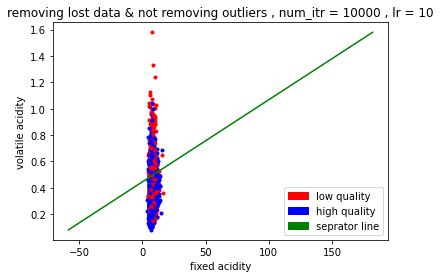

Loss = nan


In [ ]:
# 1) with removing lost data and without removing outliers
c1 = 10000 # num_itr
c2 = 10 # lr
model1 = LogisticRegression(num_iter=c1,lr=c2)
model1.fit(X1.loc[:,['fixed acidity','volatile acidity']],y1)
splot(X1.loc[:,['fixed acidity','volatile acidity']],y1,model1,c1,c2,'removing lost data & not removing outliers')
print('Loss = {}'.format(model1.loss))

<ipython-input-98-9dda5d21abab>:66: RuntimeWarning: divide by zero encountered in log
  l += y[i]*np.log(p)+(1-y[i])*np.log(1-p)
<ipython-input-98-9dda5d21abab>:66: RuntimeWarning: invalid value encountered in double_scalars
  l += y[i]*np.log(p)+(1-y[i])*np.log(1-p)


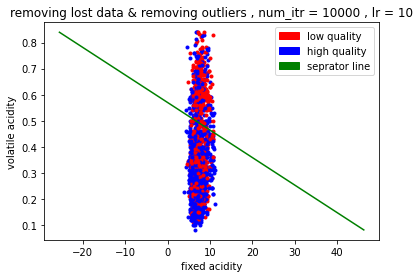

Loss = nan


In [ ]:
# 2) with removing lost data and removing outliers
c1 = 10000 # num_itr
c2 = 10 # lr
model2 = LogisticRegression(num_iter=c1,lr=c2)
model2.fit(Xo1.loc[:,['fixed acidity','volatile acidity']],yo1)
splot(Xo1.loc[:,['fixed acidity','volatile acidity']],yo1,model2,c1,c2,'removing lost data & removing outliers')
print('Loss = {}'.format(model2.loss))

<ipython-input-4-9dda5d21abab>:66: RuntimeWarning: divide by zero encountered in log
  l += y[i]*np.log(p)+(1-y[i])*np.log(1-p)
<ipython-input-4-9dda5d21abab>:66: RuntimeWarning: invalid value encountered in double_scalars
  l += y[i]*np.log(p)+(1-y[i])*np.log(1-p)


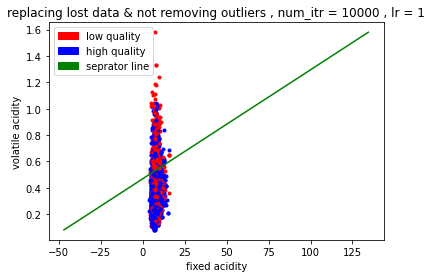

Loss = 1.8982201321876389


In [ ]:
# 3) with replacing lost data and without removing outliers
c1 = 10000 # num_itr
c2 = 1 # lr
model3 = LogisticRegression(num_iter=c1,lr=c2)
model3.fit(X2.loc[:,['fixed acidity','volatile acidity']],y2)
splot(X2.loc[:,['fixed acidity','volatile acidity']],y2,model3,c1,c2,'replacing lost data & not removing outliers')
print('Loss = {}'.format(model3.loss))

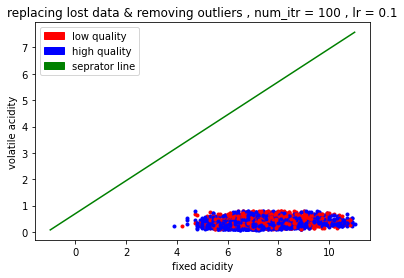

Loss = 0.6426802433023642


In [ ]:
# 4) with replacing lost data and with removing outliers
c1 = 100 # num_itr
c2 = 0.1 # lr
model4 = LogisticRegression(num_iter=c1,lr=c2)
model4.fit(Xo2.loc[:,['fixed acidity','volatile acidity']],yo2)
splot(Xo2.loc[:,['fixed acidity','volatile acidity']],yo2,model4,c1,c2,'replacing lost data & removing outliers')
print('Loss = {}'.format(model4.loss))

In [ ]:
# 5) all features with replacing lost data and with removing outliers
c1 = 100 # num_itr
c2 = 0.001 # lr
model5 = LogisticRegression(num_iter=c1,lr=c2)
model5.fit(Xo2,yo2)
print('Loss = {}'.format(model5.loss))

Loss = 0.6403946182463799


## 3. Online Linear Regression 

In this question you will simulate an online linear regressor.
For more informain refer to the HW description file.

In the code cell below you should prepare your data as introduced in the first part of 'Linear Regression' question.
For convenience, you may load the whole original dataset and do the jobs required from beginning on the original given data in the HW folder or you can use results from previous parts.

In [ ]:
# load dataset and delete any sample with a missing value
dataset = pd.read_csv('JuiceQuality.csv').loc[:,['fixed acidity','volatile acidity','citric acid','A Indx']].dropna().reset_index(drop = True)
print(dataset.head())

# Increase dimensions of features
X = np.concatenate((np.array(dataset.iloc[0:370,0:3]),np.ones((370,1))),axis=1)
y = np.array(dataset.iloc[0:370,3])

   fixed acidity  volatile acidity  citric acid     A Indx
0            5.9              0.32         0.39  13.905151
1            7.8              0.24         0.18  17.130070
2            7.7              0.58         0.01  15.618966
3            8.3              0.18         0.30  18.085322
4            6.2              0.23         0.38  14.537886


In the code block below you should write your funcion which is a Gradient Descent optimizer.

In [ ]:
def LinReg (X,y,lr=0.1,initval=np.zeros((X.shape[0])),itrnum=1000000,delta=0.000001,equal=0,rnd=4):

    w = 1.0*np.array(initval)
    l = loss(X,y,w)
    
    for t in range(itrnum):
        v = grad(X,y,w)
        
        w -= lr*v
        l = loss(X,y,w)
        
        if round(l,rnd) == equal:
            return l,w
            
        if np.linalg.norm(lr*v) <= delta:
            return l,w
    return l,w
            
def loss (X,y,w):
    l = 0
    for i in range(len(y)):
        l += (y[i]-np.dot(X[i,:],w))**2
    return l/len(y)
    
def grad (X,y,w):
    g = np.zeros((len(w)))
    for i in range(len(y)):
        g += 2*(y[i]-np.dot(X[i,:],w))*X[i,:]
    return -g/len(y)

Use your Gradient Descent function to find a (w,b) that satisfies the criteria introduced in the HW description file. Please note that you must set initial point for your optimizer at [5,-5,5,-5].

In [ ]:
lr = 0.0187
l,w = LinReg(X[0:300,:],y[0:300],lr=0.0187,initval=[5,-5,5,-5],equal=0.095,rnd=3)
print("Objective Function in Optimal Value = {}\n".format(l))
print("Optimal Value = {}\n".format(w))
print("Learning Rate = {}".format(lr))

Objective Function in Optimal Value = 0.09549981948851215

Optimal Value = [2.04749166 0.69621917 2.913356   0.0956274 ]

Learning Rate = 0.0187


Now, let's go toward SGD! Please writw your code for implementing type 1 SGD (eta-constant type) below.

In [ ]:
def LinRegSGD1 (X,y,lr,initval):

    w = 1.0*np.array(initval)
    wbar = np.zeros((len(initval)))
    
    for t in range(len(y)):
        w += lr*2*(y[t]-np.dot(X[t,:],w))*X[t,:]
        wbar += w
    
    wbar = wbar/len(y)
    return wbar
            
def loss (X,y,w):
    l = 0
    for i in range(len(y)):
        l += (y[i]-np.dot(X[i,:],w))**2
    return l/len(y)

In [ ]:
lr1 = 0.0153
wbar1 = LinRegSGD1 (X[300:370,:],y[300:370],lr1,w)
MSE1 = loss(X,y,wbar1)
print("MSE = {}\n".format(MSE1))
print("Predictor = {}\n".format(wbar1))
print("Learning Rate A = {}".format(lr1))

MSE = 0.09641490905808825

Predictor = [2.04741119 0.67960599 2.92444798 0.10293352]

Learning Rate A = 0.0153


Please write your code for implementing type 2 SGD (eta-variable type) below.

In [ ]:
def LinRegSGD2 (X,y,lr,initval):

    w = 1.0*np.array(initval)
    wbar = np.zeros((len(initval)))
    
    for t in range(len(y)):
        w += lr/math.sqrt(t+1)*2*(y[t]-np.dot(X[t,:],w))*X[t,:]
        wbar += w
    
    wbar = wbar/len(y)
    return wbar
            
def loss (X,y,w):
    l = 0
    for i in range(len(y)):
        l += (y[i]-np.dot(X[i,:],w))**2
    return l/len(y)

In [ ]:
lr2 = 0.0571
wbar2 = LinRegSGD2 (X[300:370,:],y[300:370],lr2,w)
MSE2 = loss(X,y,wbar2)
print("MSE = {}\n".format(MSE2))
print("Predictor = {}\n".format(wbar2))
print("Learning Rate B = {}".format(lr2))

MSE = 0.09662992448776574

Predictor = [2.05049701 0.62819983 2.95988385 0.09360373]

Learning Rate B = 0.0571


Below, you may provide the plots requested in the last part of the question.

In [ ]:
lrs = 0.0195
wbar2 = LinRegSGD2 (X[300:370,:],y[300:370],lrs,w)
MSE2 = loss(X,y,wbar2)
wbar1 = LinRegSGD1 (X[300:370,:],y[300:370],lrs,w)
MSE1 = loss(X,y,wbar1)
print("Learning Rate * = {}\n".format(lrs))
print("MSE1 = {}\n".format(MSE1))
print("MSE2 = {}".format(MSE2))

Learning Rate * = 0.0195

MSE1 = 0.1440067876469891

MSE2 = 0.09752348529309053


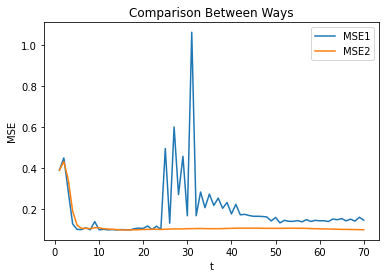

In [ ]:
def loss (X,y,w):
    l = 0
    for i in range(len(y)):
        l += (y[i]-np.dot(X[i,:],w))**2
    return l/len(y)

ww1 = 1.0*w
wwbar1 = np.zeros((4))
vMSE1 = np.zeros((70))
ww2 = 1.0*w
wwbar2 = np.zeros((4))
vMSE2 = np.zeros((70))

for t in range(70):
    ww1 += lrs*2*(y[t+300]-np.dot(X[t+300,:],ww1))*X[t+300,:]
    wwbar1 += ww1
    vMSE1[t] = loss(X,y,wwbar1/(t+1))
    
    ww2 += lrs/math.sqrt(t+1)*2*(y[t+300]-np.dot(X[t+300,:],ww2))*X[t+300,:]
    wwbar2 += ww2
    vMSE2[t] = loss(X,y,wwbar2/(t+1))

plt.figure()
plt.xlabel('t')
plt.ylabel('MSE')
plt.title('Comparison Between Ways')

plt.plot(np.arange(1,71),vMSE1)
plt.plot(np.arange(1,71),vMSE2)

plt.legend(['MSE1','MSE2'])
plt.show()